<a href="https://colab.research.google.com/github/kluless13/LargeScaleDataAnalysis/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Aug  6 17:30:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

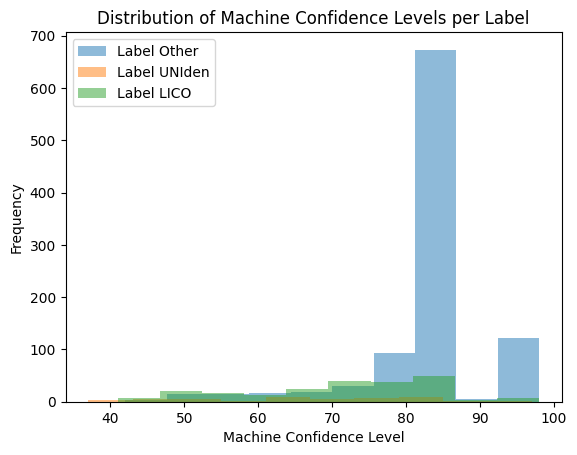

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = '/content/% cover calculations.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# List of unique labels in the 'label' column
labels = df['Label'].unique()

# Plot the histogram for each label
for label_name in labels:
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Plot the machine confidence levels for the current label
    plt.hist(label_data['Machine confidence 1'], bins=10, alpha=0.5, label=f'Label {label_name}')

# Add labels and title
plt.xlabel('Machine Confidence Level')
plt.ylabel('Frequency')
plt.title('Distribution of Machine Confidence Levels per Label')
plt.legend(loc='upper left')

# Show the plot
plt.show()

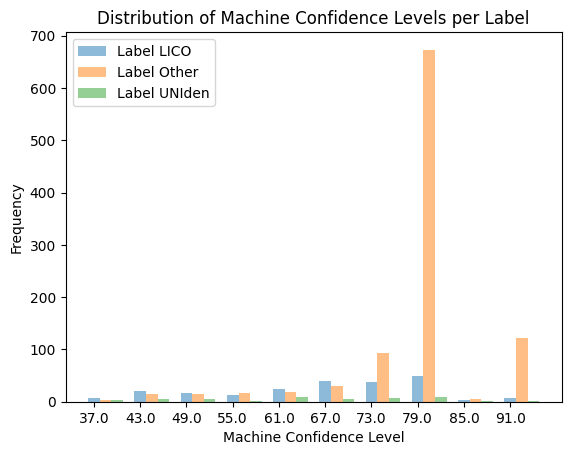

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
file_path = '/content/% cover calculations.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Create an array of positions for the bars
positions = np.arange(10)  # Assuming 10 bins for the histogram

# Set the width of the bars
width = 1 / (len(labels) + 1)

# Plot the bars for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, bin_edges = np.histogram(label_data['Machine confidence 1'], bins=10)

    # Plot the bars for the current label at the specified positions
    plt.bar(positions + i * width, hist_data, width=width, alpha=0.5, label=f'Label {label_name}')

# Add labels and title
plt.xlabel('Machine Confidence Level')
plt.ylabel('Frequency')
plt.title('Distribution of Machine Confidence Levels per Label')
plt.legend(loc='upper left')

# Customize the x-ticks to represent the bin edges
plt.xticks(positions, [f'{x:.1f}' for x in bin_edges[:-1]])

# Show the plot
plt.show()


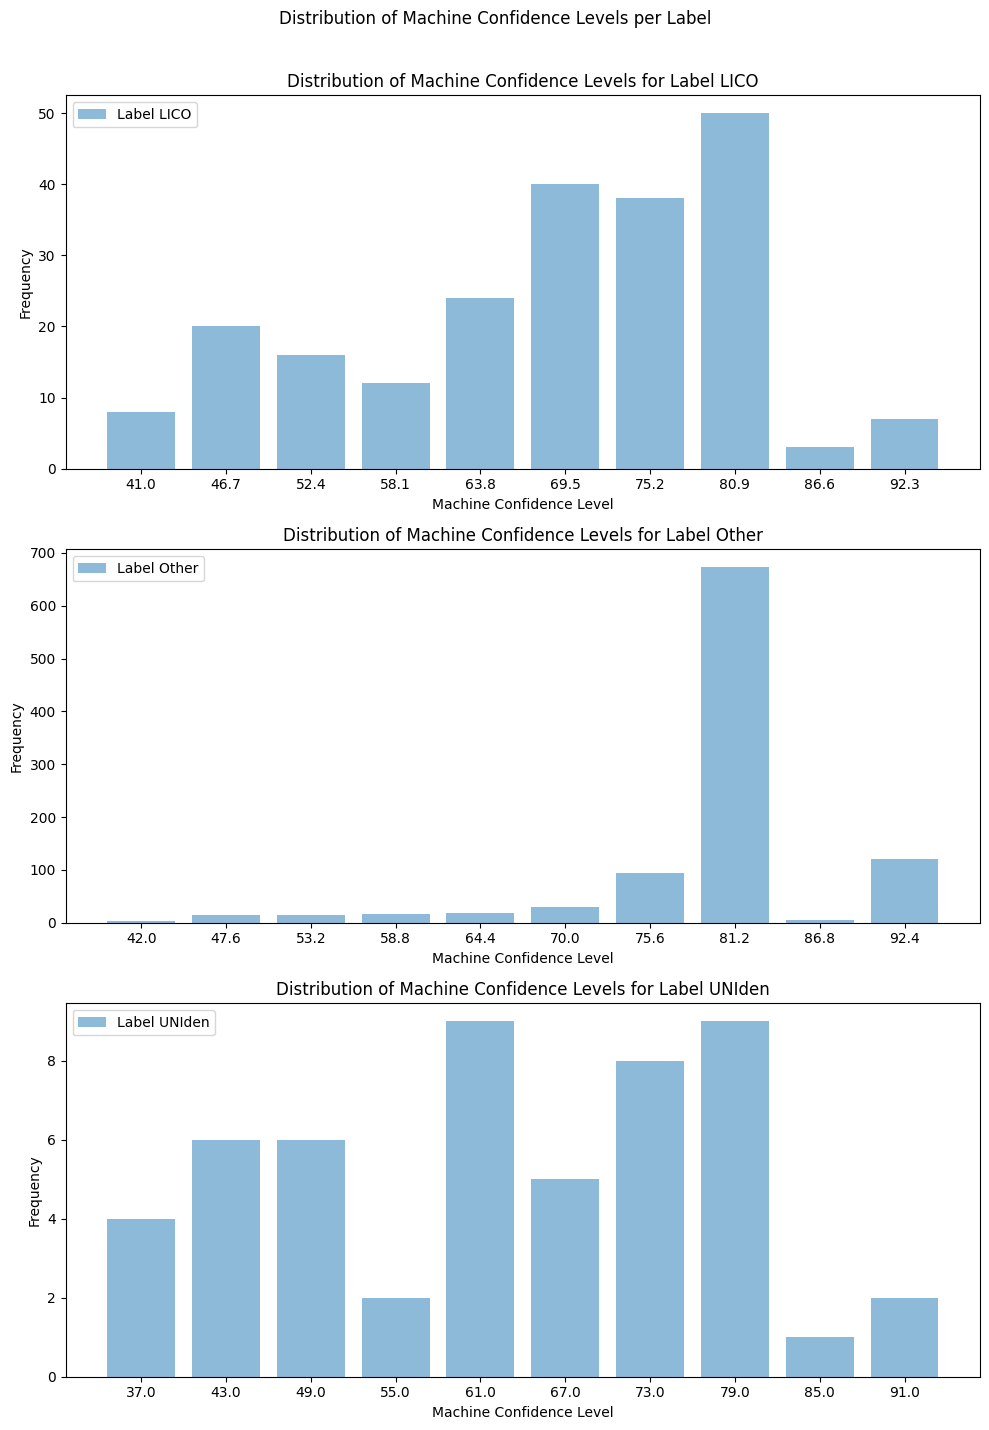

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
file_path = '/content/% cover calculations.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 5 * 3))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, bin_edges = np.histogram(label_data['Machine confidence 1'], bins=10)

    # Plot the bars for the current label
    axes[i].bar(np.arange(10), hist_data, alpha=0.5, label=f'Label {label_name}')

    # Add labels and title for the subplot
    axes[i].set_xlabel('Machine Confidence Level')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Machine Confidence Levels for Label {label_name}')
    axes[i].legend(loc='upper left')

    # Customize the x-ticks to represent the bin edges
    axes[i].set_xticks(np.arange(10))
    axes[i].set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Add a general title for the whole figure
plt.suptitle('Distribution of Machine Confidence Levels per Label')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sample_csv = '/content/csv/1_%.csv'
df_sample = pd.read_csv(sample_csv)
print(df_sample.head(962))

                    Name  Row  Column  Label Machine suggestion 1  \
0    1_130_000000001.jpg    4     518  Other                  NaN   
1    1_130_000000001.jpg    7    1347  Other                  NaN   
2    1_130_000000001.jpg   63     275  Other                  NaN   
3    1_130_000000001.jpg   81    1815  Other                  NaN   
4    1_130_000000001.jpg  120    1071  Other                  NaN   
..                   ...  ...     ...    ...                  ...   
957  1_130_000000080.jpg  124    1574  Other                  NaN   
958  1_130_000000080.jpg  127    1865  Other                  NaN   
959  1_130_000000080.jpg  173     823  Other                  NaN   
960  1_130_000000081.jpg   33    1457  Other                Other   
961  1_130_000000081.jpg   30    1672  Other                Other   

     Machine confidence 1 Machine suggestion 2  Machine confidence 2  \
0                     NaN                  NaN                   NaN   
1                     NaN  

In [13]:
import glob

csv_files = glob.glob('/content/csv/*.csv')
dfs = [pd.read_csv(file) for file in csv_files]
df_combined = pd.concat(dfs, ignore_index=True)

In [14]:
print(df_combined.head())
print(df_combined.columns)

                  Name  Row  Column  Label Machine suggestion 1  \
0  3_130_000006006.jpg    3     375  Other                Other   
1  3_130_000006006.jpg    9     728  Other                Other   
2  3_130_000006006.jpg   26     478  Other                Other   
3  3_130_000006006.jpg   36     809  Other                Other   
4  3_130_000006006.jpg    4    1364  Other                Other   

   Machine confidence 1 Machine suggestion 2  Machine confidence 2  \
0                  90.0                 LICO                   7.0   
1                  90.0                 LICO                   7.0   
2                  90.0                 LICO                   7.0   
3                  90.0                 LICO                   7.0   
4                  90.0                 LICO                   7.0   

  Machine suggestion 3  Machine confidence 3  Machine suggestion 4  \
0               UNIden                   3.0                   NaN   
1               UNIden              

In [15]:
output_file_path = '/content/combined_data.csv'
df_combined.to_csv(output_file_path, index=False)

<ipython-input-5-9d2de438ab73>:4: DtypeWarning: Columns (0,3,4,6,8,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                  Name   Row  Column  Label Machine suggestion 1  \
0  2_130_000003003.jpg   6.0   762.0  Other                Other   
1  2_130_000003003.jpg  29.0  1079.0  Other                Other   
2  2_130_000003003.jpg  67.0  1210.0  Other                Other   
3  2_130_000003003.jpg  51.0  1285.0  Other                Other   
4  2_130_000003003.jpg  55.0  2075.0  Other                Other   

   Machine confidence 1 Machine suggestion 2  Machine confidence 2  \
0                  90.0                 LICO                   7.0   
1                  90.0                 LICO                   7.0   
2                  90.0                 LICO                   7.0   
3                  90.0                 LICO                   7.0   
4                  85.0                 LICO                   8.0   

  Machine suggestion 3  Machine confidence 3  ...  frame_index  depth  \
0               UNIden                   3.0  ...          NaN    NaN   
1               UNIden  

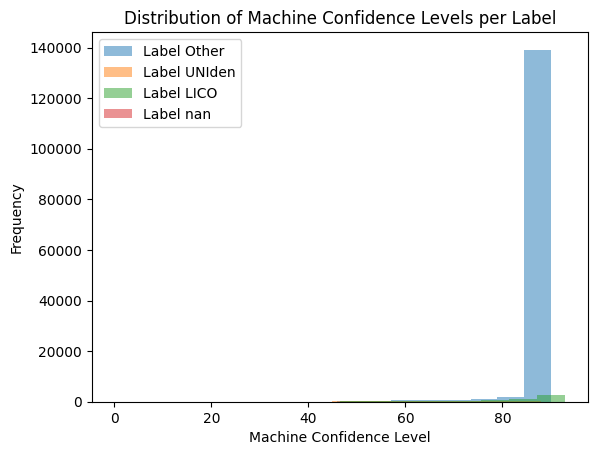

In [5]:
# Label test for combined csv

file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# List of unique labels in the 'Label' column
labels = df['Label'].unique()

# Plot the histogram for each label
for label_name in labels:
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Drop NaN values in the 'Machine confidence 1' column
    label_data = label_data.dropna(subset=['Machine confidence 1'])

    # Print a sample to check the data
    print(label_data.head())

    # Plot the machine confidence levels for the current label
    plt.hist(label_data['Machine confidence 1'], bins=10, alpha=0.5, label=f'Label {label_name}')

# Add labels and title
plt.xlabel('Machine Confidence Level')
plt.ylabel('Frequency')
plt.title('Distribution of Machine Confidence Levels per Label')
plt.legend(loc='upper left')

# Show the plot
plt.show()


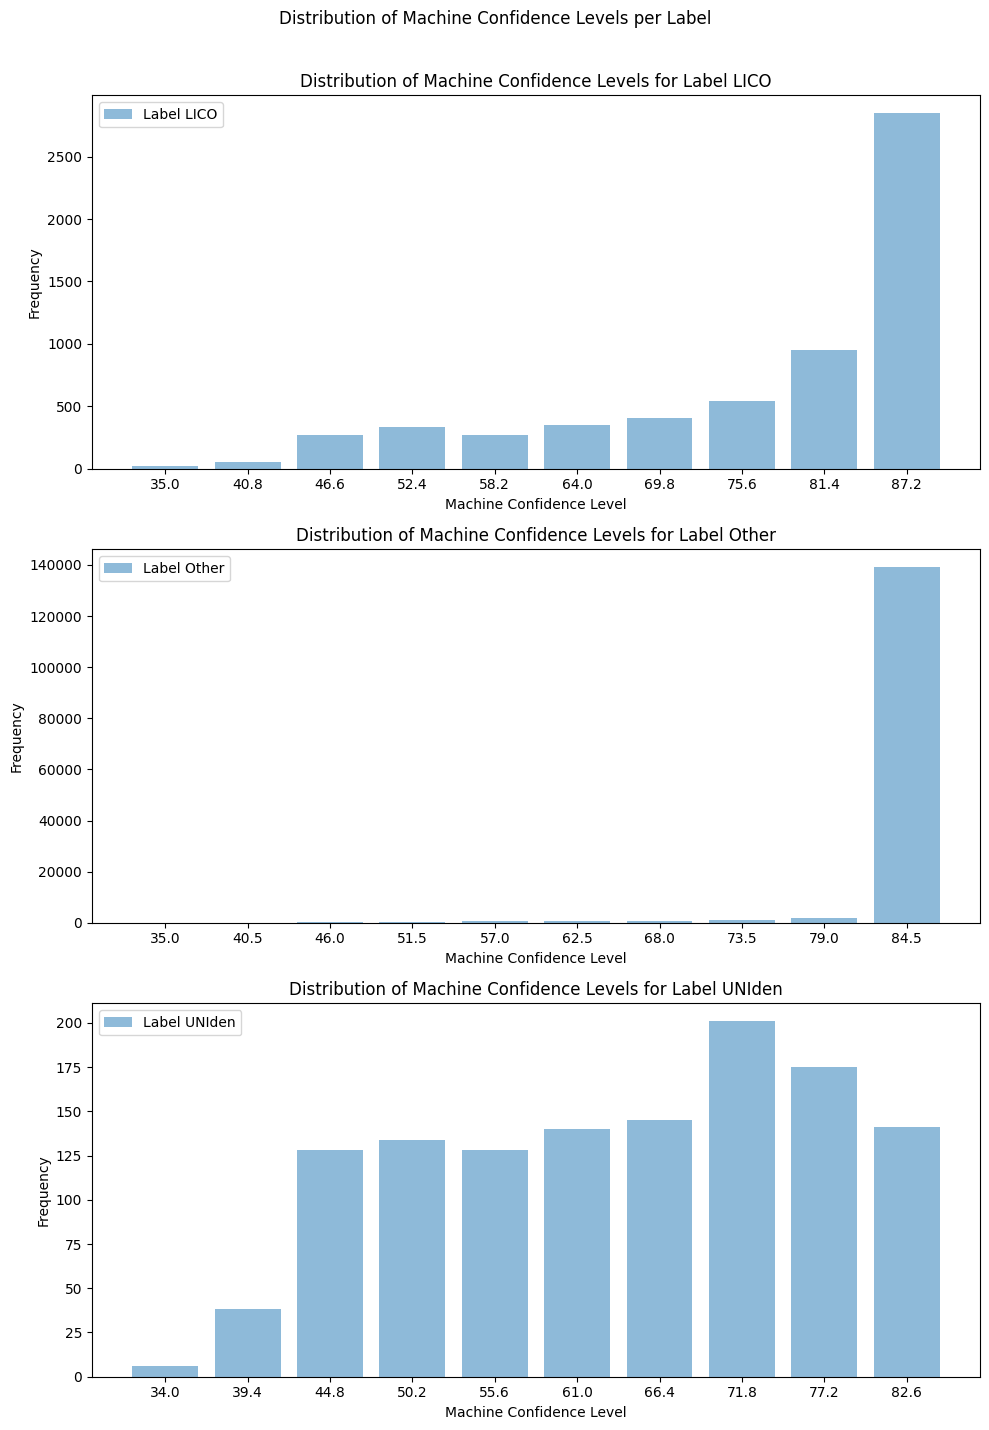

In [11]:
# Code for 3 histograms

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 5 * 3))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, bin_edges = np.histogram(label_data['Machine confidence 1'], bins=10)

    # Plot the bars for the current label
    axes[i].bar(np.arange(10), hist_data, alpha=0.5, label=f'Label {label_name}')

    # Add labels and title for the subplot
    axes[i].set_xlabel('Machine Confidence Level')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Machine Confidence Levels for Label {label_name}')
    axes[i].legend(loc='upper left')

    # Customize the x-ticks to represent the bin edges
    axes[i].set_xticks(np.arange(10))
    axes[i].set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Add a general title for the whole figure
plt.suptitle('Distribution of Machine Confidence Levels per Label')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()

<ipython-input-9-2cc88d4be4b6>:9: DtypeWarning: Columns (0,3,4,6,8,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


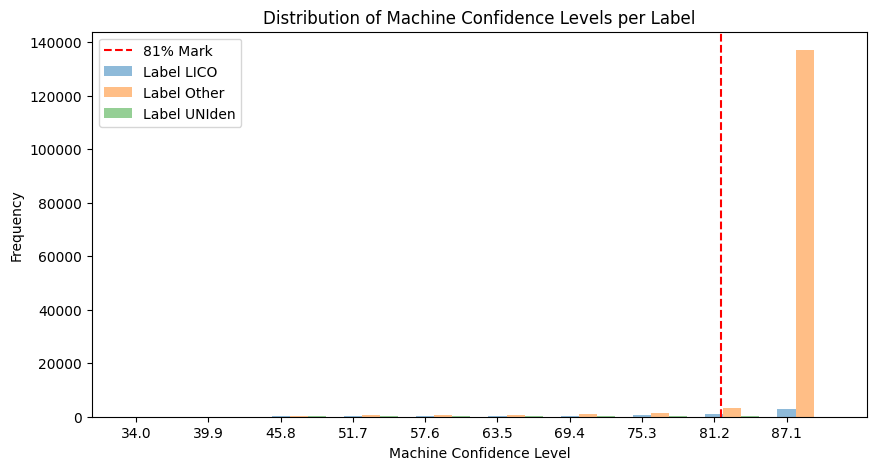

In [9]:
# Code for clustered columns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Determine the number of bins and bin edges
num_bins = 10
bin_edges = np.linspace(df['Machine confidence 1'].min(), df['Machine confidence 1'].max(), num_bins+1)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, _ = np.histogram(label_data['Machine confidence 1'], bins=bin_edges)

    # Plot the bars for the current label with a slight offset
    ax.bar(np.arange(num_bins) + i*0.25, hist_data, width=0.25, alpha=0.5, label=f'Label {label_name}')

# Add a vertical line at the 81% mark
ax.axvline(x=8.1, color='r', linestyle='--', label='81% Mark')

# Add labels and title
ax.set_xlabel('Machine Confidence Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Machine Confidence Levels per Label')
ax.legend(loc='upper left')

# Customize the x-ticks to represent the bin edges
ax.set_xticks(np.arange(num_bins))
ax.set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Show the plot
plt.show()

<ipython-input-11-279043c6e471>:7: DtypeWarning: Columns (0,3,4,6,8,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


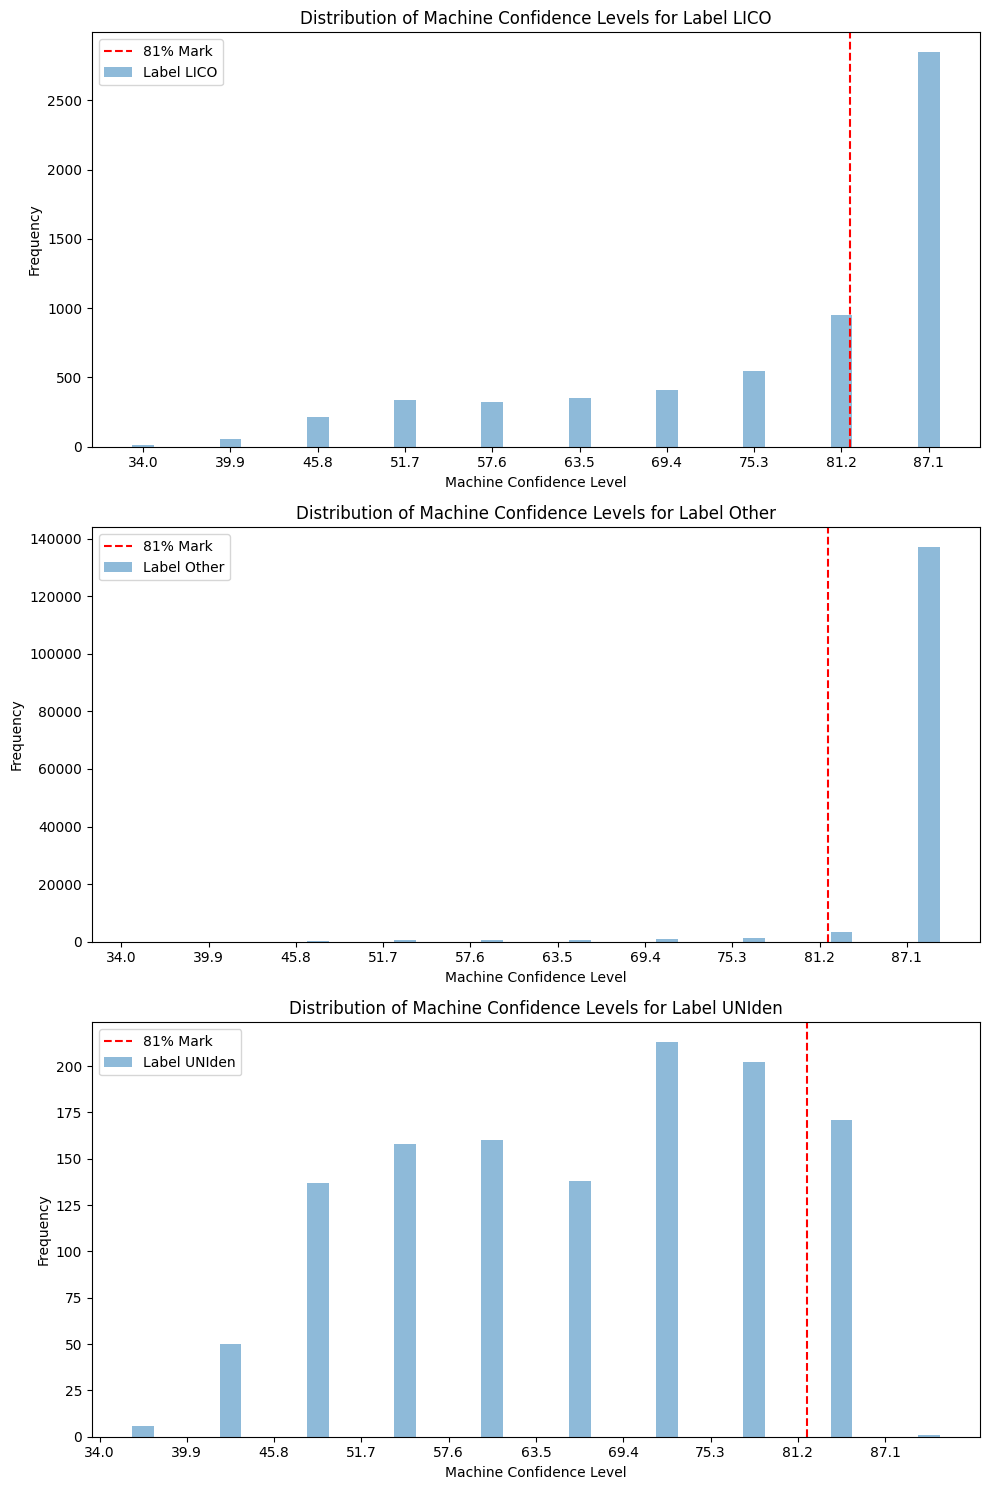

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Determine the number of bins and bin edges
num_bins = 10
bin_edges = np.linspace(df['Machine confidence 1'].min(), df['Machine confidence 1'].max(), num_bins+1)

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 5 * 3))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, _ = np.histogram(label_data['Machine confidence 1'], bins=bin_edges)

    # Plot the bars for the current label with a slight offset
    axes[i].bar(np.arange(num_bins) + i*0.25, hist_data, width=0.25, alpha=0.5, label=f'Label {label_name}')

    # Add a vertical line at the 81% mark
    axes[i].axvline(x=8.1, color='r', linestyle='--', label='81% Mark')

    # Add labels and title
    axes[i].set_xlabel('Machine Confidence Level')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Machine Confidence Levels for Label {label_name}')
    axes[i].legend(loc='upper left')

    # Customize the x-ticks to represent the bin edges
    axes[i].set_xticks(np.arange(num_bins))
    axes[i].set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Show the plots
plt.tight_layout()
plt.show()


<ipython-input-12-7fdb221e2eff>:7: DtypeWarning: Columns (0,3,4,6,8,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


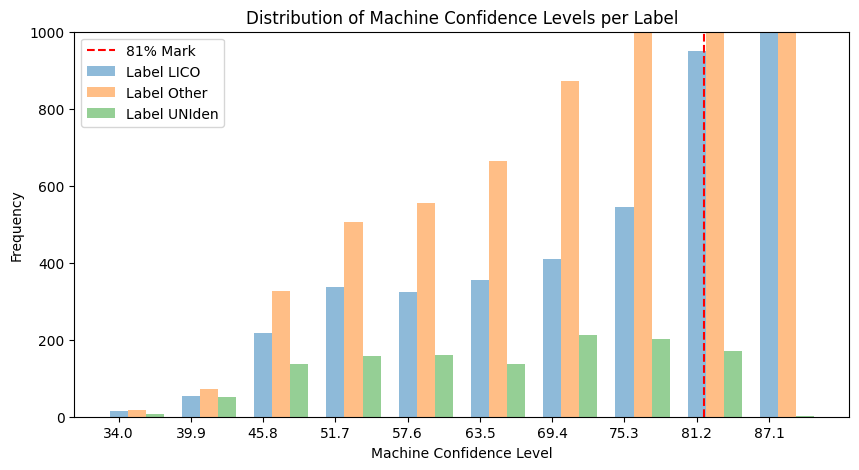

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Determine the number of bins and bin edges
num_bins = 10
bin_edges = np.linspace(df['Machine confidence 1'].min(), df['Machine confidence 1'].max(), num_bins+1)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, _ = np.histogram(label_data['Machine confidence 1'], bins=bin_edges)

    # Plot the bars for the current label with a slight offset
    ax.bar(np.arange(num_bins) + i*0.25, hist_data, width=0.25, alpha=0.5, label=f'Label {label_name}')

# Add a vertical line at the 81% mark
ax.axvline(x=8.1, color='r', linestyle='--', label='81% Mark')

# Add labels and title
ax.set_xlabel('Machine Confidence Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Machine Confidence Levels per Label')
ax.legend(loc='upper left')

# Set the y-axis limits
ax.set_ylim([0, 1000])

# Customize the x-ticks to represent the bin edges
ax.set_xticks(np.arange(num_bins))
ax.set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Show the plot
plt.show()

<ipython-input-24-8fe5941b1fd9>:8: DtypeWarning: Columns (0,3,4,6,8,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


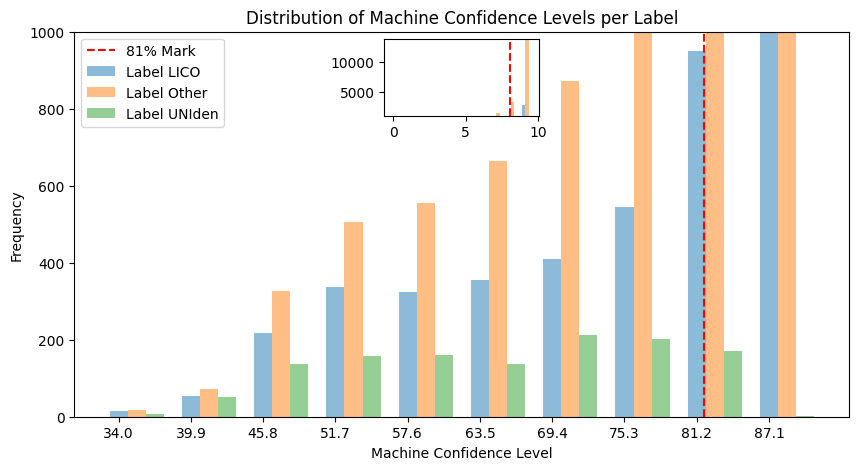

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read the CSV file
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)

# Drop rows with NaN in 'Machine confidence 1'
df = df.dropna(subset=['Machine confidence 1'])

# List of unique labels in the 'Label' column
labels = sorted(df['Label'].unique())

# Determine the number of bins and bin edges
num_bins = 10
bin_edges = np.linspace(df['Machine confidence 1'].min(), df['Machine confidence 1'].max(), num_bins+1)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram for each label
for i, label_name in enumerate(labels):
    # Filter the DataFrame by label
    label_data = df[df['Label'] == label_name]

    # Compute the histogram data
    hist_data, _ = np.histogram(label_data['Machine confidence 1'], bins=bin_edges)

    # Plot the bars for the current label with a slight offset
    ax.bar(np.arange(num_bins) + i*0.25, hist_data, width=0.25, alpha=0.5, label=f'Label {label_name}')

# Add a vertical line at the 81% mark
ax.axvline(x=8.1, color='r', linestyle='--', label='81% Mark')

# Add labels and title
ax.set_xlabel('Machine Confidence Level')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Machine Confidence Levels per Label')
ax.legend(loc='upper left')

# Set the y-axis limits
ax.set_ylim([0, 1000])

# Create a break in the y-axis
ax2 = inset_axes(ax, width="20%", height="20%", loc=9)
ax2.set_ylim([1000, 14000])

# Plot the same histogram on the ax2
for i, label_name in enumerate(labels):
    label_data = df[df['Label'] == label_name]
    hist_data, _ = np.histogram(label_data['Machine confidence 1'], bins=bin_edges)
    ax2.bar(np.arange(num_bins) + i*0.25, hist_data, width=0.25, alpha=0.5, label=f'Label {label_name}')

ax2.axvline(x=8.1, color='r', linestyle='--')

# Customize the x-ticks to represent the bin edges
ax.set_xticks(np.arange(num_bins))
ax.set_xticklabels([f'{x:.1f}' for x in bin_edges[:-1]])

# Show the plot
plt.show()

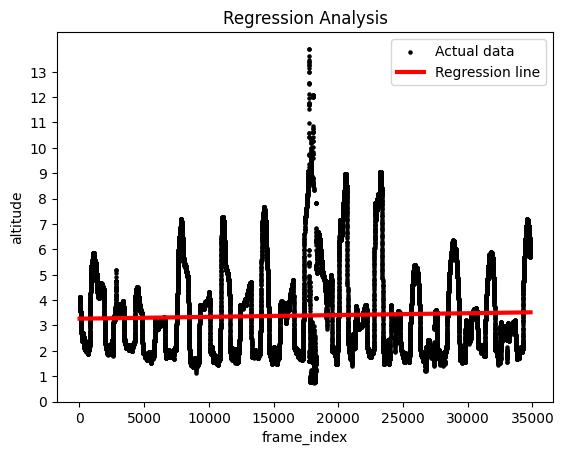

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('/content/Metadata.csv')

# Drop rows containing NaN values in 'altitude' column
df = df.dropna(subset=['altitude'])

# Now, re-extract the variables and perform the regression and visualization as previously described.
X = df[['frame_index']]
y = df['altitude']

# Perform linear regression
reg = LinearRegression().fit(X, y)

# Predict y values using the model
y_pred = reg.predict(X)

# Plotting
plt.scatter(X, y, color='black', label='Actual data', s=5)
plt.plot(X, y_pred, color='red', label='Regression line', linewidth= 3)
plt.yticks(range(int(min(y)), int(max(y)) + 1))
plt.title('Regression Analysis')
plt.xlabel('frame_index')
plt.ylabel('altitude')
plt.legend()
plt.show()



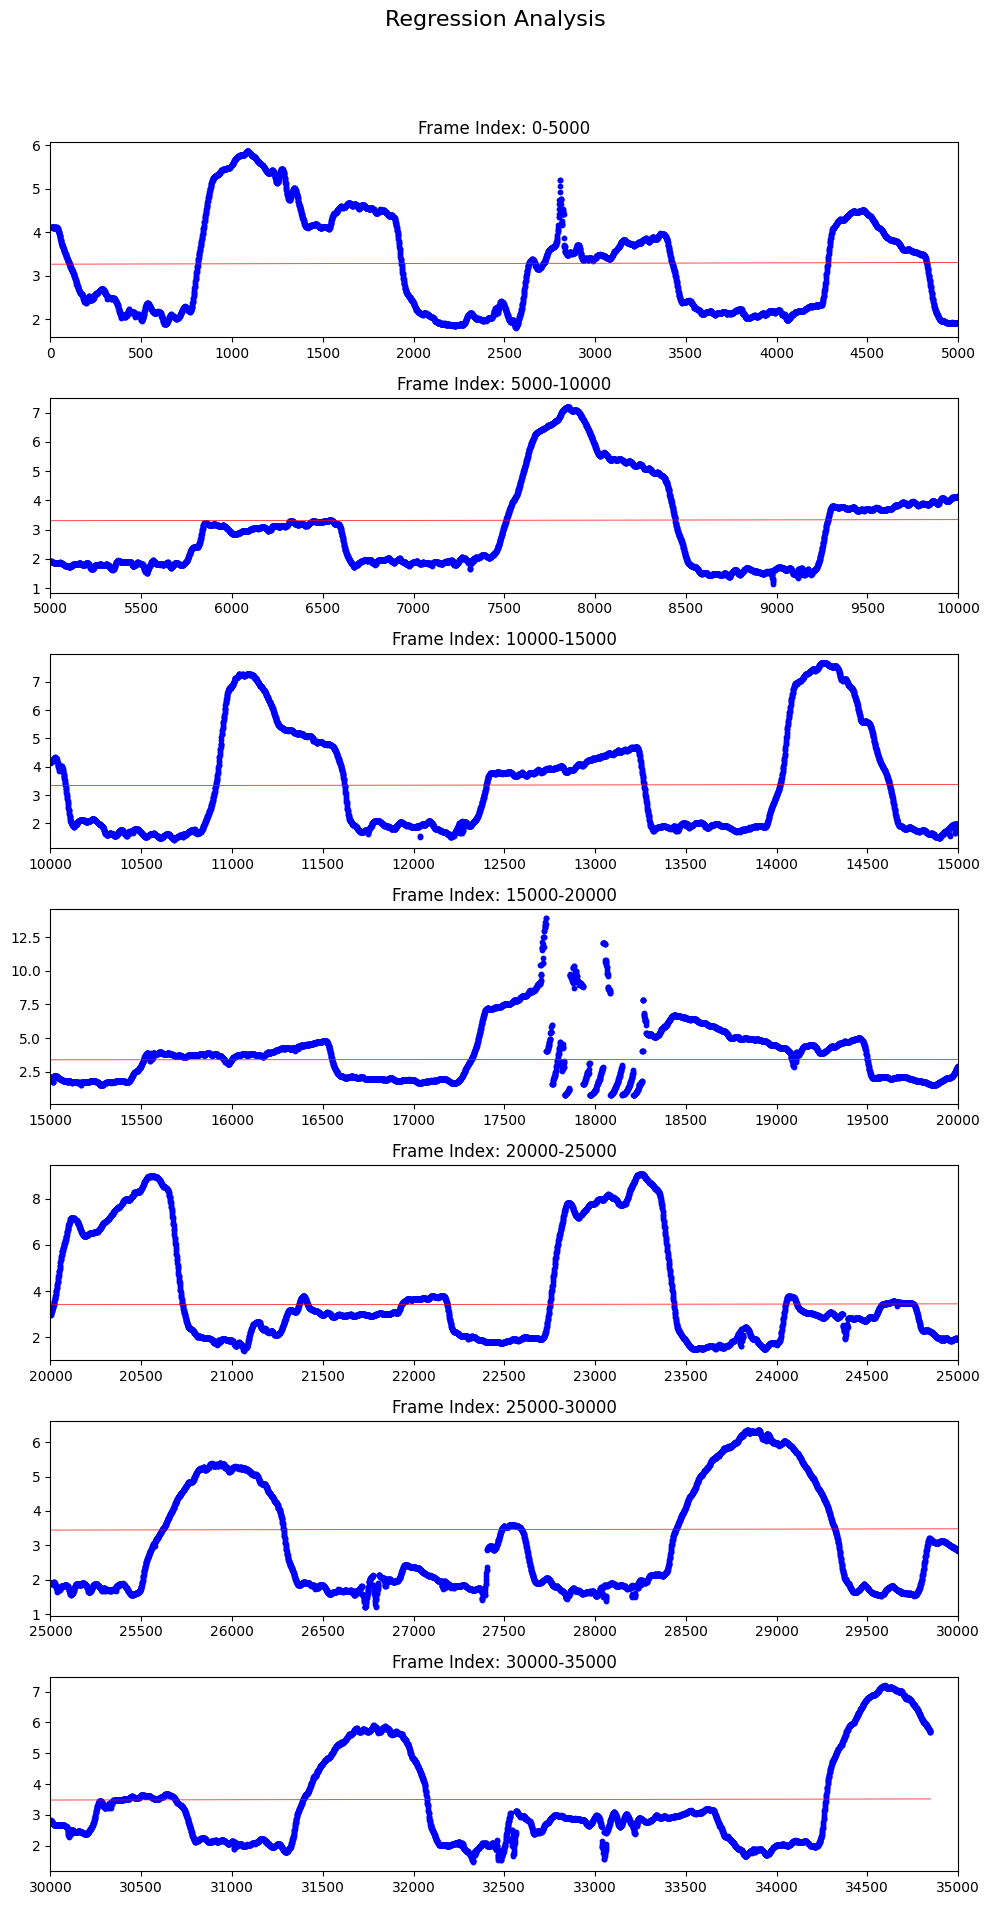

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('/content/Metadata.csv')
df = df.dropna(subset=['altitude'])

# Extract the variables and perform regression
X = df[['frame_index']]
y = df['altitude']
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Setting up the subplots
fig, axs = plt.subplots(7, 1, figsize=(10, 20))

for i in range(7):
    start, end = i * 5000, (i + 1) * 5000
    mask = (X['frame_index'] >= start) & (X['frame_index'] < end)

    axs[i].scatter(X[mask], y[mask], color='blue', s=10)
    axs[i].plot(X[mask], y_pred[mask], color='red', linewidth=0.5)
    axs[i].set_xlim(start, end)
    axs[i].set_xticks(np.arange(start, end+1, 500))
    axs[i].set_title(f'Frame Index: {start}-{end}')

# Global settings and show
fig.suptitle('Regression Analysis', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to ensure the title fits well
plt.show()


                             OLS Regression Results                             
Dep. Variable:     Machine confidence 1   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     132.2
Date:                  Tue, 08 Aug 2023   Prob (F-statistic):           2.82e-30
Time:                          10:22:38   Log-Likelihood:                -24313.
No. Observations:                  6052   AIC:                         4.863e+04
Df Residuals:                      6050   BIC:                         4.864e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.9757      0.502

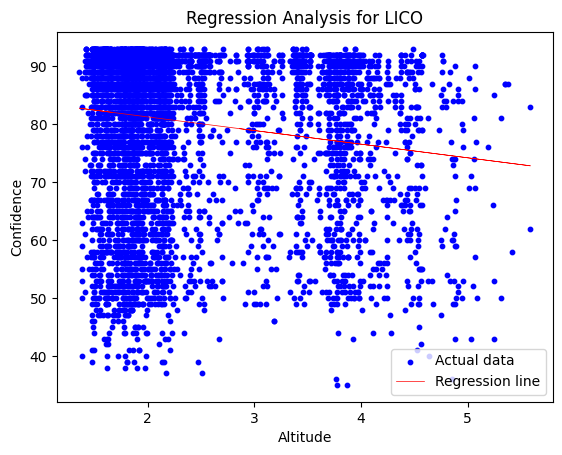

In [34]:
#LICO only

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/merge.csv')

# Filter rows where the machine's suggestion is "LICO"
df_lico = df[df['Machine suggestion 1'] == 'LICO']

# Drop rows with missing values in 'Machine confidence 1' or 'altitude'
df_lico = df_lico.dropna(subset=['Machine confidence 1', 'altitude'])

# Assigning the variables
X = df_lico['altitude']
y = df_lico['Machine confidence 1']

# Add a constant to the independent variable (using statsmodels)
X = sm.add_constant(X)

# Perform linear regression (using statsmodels)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Visual representation
y_pred = model.predict(X)
plt.scatter(df_lico['altitude'], y, color='blue', s=10, label='Actual data')
plt.plot(df_lico['altitude'], y_pred, color='red', linewidth=0.5, label='Regression line')
plt.title('Regression Analysis for LICO')
plt.xlabel('Altitude')
plt.ylabel('Confidence')
plt.legend()
plt.show()


                             OLS Regression Results                             
Dep. Variable:     Machine confidence 1   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.007
Method:                   Least Squares   F-statistic:                     1044.
Date:                  Tue, 08 Aug 2023   Prob (F-statistic):          2.73e-228
Time:                          08:39:01   Log-Likelihood:            -4.1663e+05
No. Observations:                144731   AIC:                         8.333e+05
Df Residuals:                    144729   BIC:                         8.333e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3756      0.027

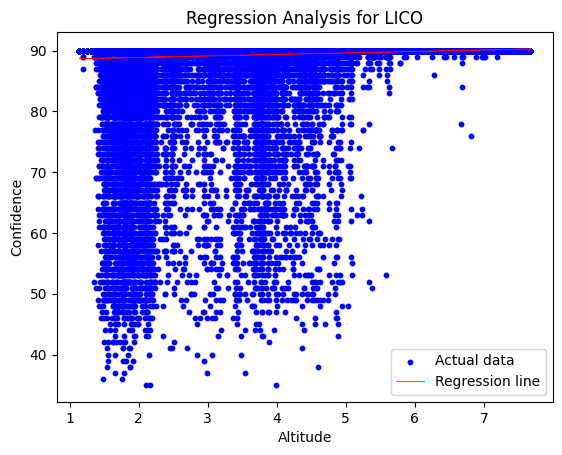

In [21]:
#Other only

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/merge.csv')

# Filter rows where the machine's suggestion is "Other"
df_lico = df[df['Machine suggestion 1'] == 'Other']

# Drop rows with missing values in 'Machine confidence 1' or 'altitude'
df_lico = df_lico.dropna(subset=['Machine confidence 1', 'altitude'])

# Assigning the variables
X = df_lico['altitude']
y = df_lico['Machine confidence 1']

# Add a constant to the independent variable (using statsmodels)
X = sm.add_constant(X)

# Perform linear regression (using statsmodels)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Visual representation
y_pred = model.predict(X)
plt.scatter(df_lico['altitude'], y, color='blue', s=10, label='Actual data')
plt.plot(df_lico['altitude'], y_pred, color='red', linewidth=0.5, label='Regression line')
plt.title('Regression Analysis for LICO')
plt.xlabel('Altitude')
plt.ylabel('Confidence')
plt.legend()
plt.show()


                             OLS Regression Results                             
Dep. Variable:     Machine confidence 1   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     4.758
Date:                  Tue, 08 Aug 2023   Prob (F-statistic):             0.0293
Time:                          08:40:10   Log-Likelihood:                -4880.9
No. Observations:                  1233   AIC:                             9766.
Df Residuals:                      1231   BIC:                             9776.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4709      1.033

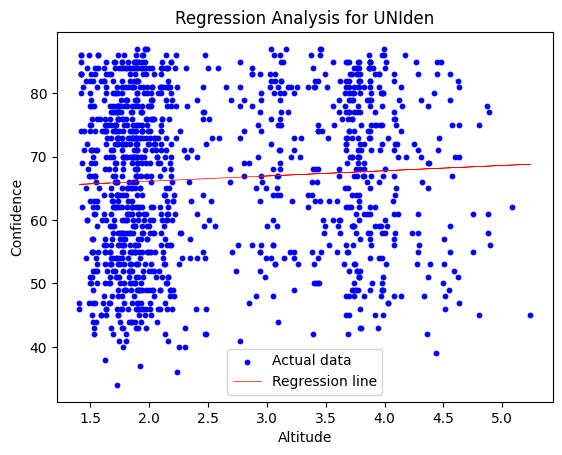

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/merge.csv')

# Filter rows where the machine's suggestion is "LICO"
df_lico = df[df['Machine suggestion 1'] == 'UNIden']

# Drop rows with missing values in 'Machine confidence 1' or 'altitude'
df_lico = df_lico.dropna(subset=['Machine confidence 1', 'altitude'])

# Assigning the variables
X = df_lico['altitude']
y = df_lico['Machine confidence 1']

# Add a constant to the independent variable (using statsmodels)
X = sm.add_constant(X)

# Perform linear regression (using statsmodels)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Visual representation
y_pred = model.predict(X)
plt.scatter(df_lico['altitude'], y, color='blue', s=10, label='Actual data')
plt.plot(df_lico['altitude'], y_pred, color='red', linewidth=0.5, label='Regression line')
plt.title('Regression Analysis for UNIden')
plt.xlabel('Altitude')
plt.ylabel('Confidence')
plt.legend()
plt.show()


                             OLS Regression Results                             
Dep. Variable:     Machine confidence 1   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.007
Method:                   Least Squares   F-statistic:                     1044.
Date:                  Tue, 08 Aug 2023   Prob (F-statistic):          2.73e-228
Time:                          08:39:38   Log-Likelihood:            -4.1663e+05
No. Observations:                144731   AIC:                         8.333e+05
Df Residuals:                    144729   BIC:                         8.333e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3756      0.027

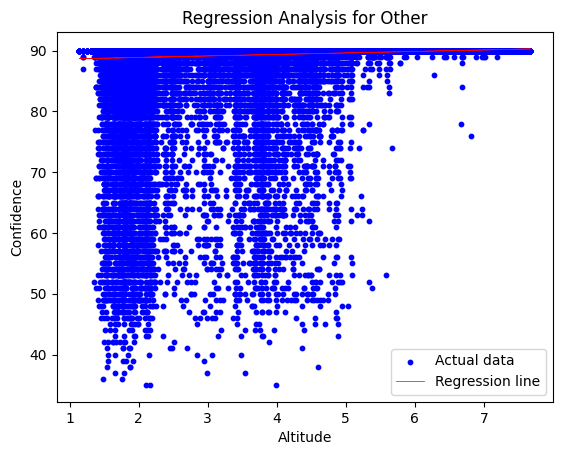

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/merge.csv')

# Filter rows where the machine's suggestion is "LICO"
df_lico = df[df['Machine suggestion 1'] == 'Other']

# Drop rows with missing values in 'Machine confidence 1' or 'altitude'
df_lico = df_lico.dropna(subset=['Machine confidence 1', 'altitude'])

# Assigning the variables
X = df_lico['altitude']
y = df_lico['Machine confidence 1']

# Add a constant to the independent variable (using statsmodels)
X = sm.add_constant(X)

# Perform linear regression (using statsmodels)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Visual representation
y_pred = model.predict(X)
plt.scatter(df_lico['altitude'], y, color='blue', s=10, label='Actual data')
plt.plot(df_lico['altitude'], y_pred, color='red', linewidth=0.5, label='Regression line')
plt.title('Regression Analysis for Other')
plt.xlabel('Altitude')
plt.ylabel('Confidence')
plt.legend()
plt.show()


In [33]:
import pandas as pd

# Load the merged data
df = pd.read_csv('/content/merge.csv')

# Filter for rows where the machine's suggestion is "LICO"
df_lico = df[df['Machine suggestion 1'] == 'LICO']

# Filter and save A.csv
df_a = df_lico[(df_lico['Machine confidence 1'] >= 35) &
               (df_lico['Machine confidence 1'] <= 45) &
               (df_lico['altitude'] >= 0.1) &
               (df_lico['altitude'] <= 3)]
df_a.to_csv('/content/A.csv', index=False)

# Filter and save B.csv
df_b = df_lico[(df_lico['Machine confidence 1'] > 80) &
               (df_lico['altitude'] >= 2.8) &
               (df_lico['altitude'] <= 3.2)]
df_b.to_csv('/content/B.csv', index=False)

# Filter and save C.csv
df_c = df_lico[(df_lico['Machine confidence 1'] > 79) &
               (df_lico['altitude'] >= 3.2) &
               (df_lico['altitude'] <= 3.6)]
df_c.to_csv('/content/C.csv', index=False)

# Filter and save D.csv
df_d = df_lico[(df_lico['Machine confidence 1'] > 78) &
               (df_lico['altitude'] >= 3.6) &
               (df_lico['altitude'] <= 4.1)]
df_d.to_csv('/content/D.csv', index=False)


In [35]:
import pandas as pd

# Load the merged CSV file into a dataframe
merged_df = pd.read_csv('/content/merge.csv')

# Filter the dataframe for rows where the label is 'LICO'
lico_df = merged_df[merged_df['Label'] == 'LICO']

# Save the filtered dataframe to a new CSV file
lico_df.to_csv('/content/lico_only.csv', index=False)


In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/B1.csv')

# Exclude 'Unident' rows
df = df[df['Label'] != 'Unident']

# Aggregate 12 rows per image into a single row
aggregated_df = df.groupby('Name').agg(
    LICO_count=('Label', lambda x: (x == 'LICO').sum()),
    Other_count=('Label', lambda x: (x == 'Other').sum())
)

# Calculate % LICO for each image
aggregated_df['%LICO'] = aggregated_df['LICO_count'] / (aggregated_df['LICO_count'] + aggregated_df['Other_count'])

# Reset index so 'Name' becomes a regular column
aggregated_df = aggregated_df.reset_index()

aggregated_df.to_csv('/content/aggregated_per_image.csv', index=False)

print(aggregated_df.head())


                    Name  LICO_count  Other_count     %LICO
0  B110_000000166_B1.jpg           2           10  0.166667
1  B110_000000167_B1.jpg           1           11  0.083333
2  B110_000000168_B1.jpg           0           12  0.000000
3  B110_000000169_B1.jpg           1           11  0.083333
4  B110_000000170_B1.jpg           2           10  0.166667


In [6]:
import pandas as pd

aggregated_df = pd.read_csv('/content/aggregated_per_image.csv')

# 1-m Level (6 images) Aggregation
def aggregate_lico_1m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    return pd.Series({
        'SUM_LICO_6': sum_lico,
        'SUM_OTHER_6': sum_other,
        '%LICO_6_images': sum_lico / (sum_lico + sum_other)
    })

agg_1m = aggregated_df.groupby(aggregated_df.index // 6).apply(aggregate_lico_1m)
agg_1m.to_csv('/content/aggregated_1m.csv', index=False)

# 10-m Level (60 images) Aggregation
def aggregate_lico_10m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    return pd.Series({
        'SUM_LICO_60': sum_lico,
        'SUM_OTHER_60': sum_other,
        '%LICO_60_images': sum_lico / (sum_lico + sum_other)
    })

agg_10m = aggregated_df.groupby(aggregated_df.index // 60).apply(aggregate_lico_10m)
agg_10m.to_csv('/content/aggregated_10m.csv', index=False)

# Grand Aggregate for the Entire Site
total_lico = aggregated_df['LICO_count'].sum()
total_other = aggregated_df['Other_count'].sum()
grand_aggregate = total_lico / (total_lico + total_other)

print(f"Ummahat9.5 had, on average, {grand_aggregate*100:.2f}% live coral cover.")

Ummahat9.5 had, on average, 7.86% live coral cover.


In [7]:
import pandas as pd

# Load the aggregated CSV file into a DataFrame
df = pd.read_csv('/content/aggregated_per_image.csv')

# Sort the DataFrame by %LICO in descending order and get the top 5
top_5_lico = df.sort_values(by='%LICO', ascending=False).head(5)

print(top_5_lico[['Name', '%LICO']])

                       Name     %LICO
1987  B110_000005219_B1.jpg  0.909091
1801  B110_000004233_B1.jpg  0.750000
1986  B110_000005218_B1.jpg  0.750000
1983  B110_000005215_B1.jpg  0.750000
1980  B110_000005212_B1.jpg  0.727273


In [3]:
# Step 1:

import pandas as pd

# List of filenames and their prefixes to be removed
filenames = ['/content/B1.csv', '/content/B2.csv', '/content/B3.csv', '/content/B4.csv', '/content/B5.csv', '/content/B6.csv', '/content/B7.csv']
prefixes = ['B110_', 'B2_', 'B3_', 'B4_', 'B5_', 'B6_', 'B7_']

merged_data = []

# Loop through each file, process the 'Name' column and append to merged_data
for i, filename in enumerate(filenames):
    df = pd.read_csv(filename)

    # For B1, remove 'B110_' prefix and '_B1' suffix
    if i == 0:
        df['Name'] = df['Name'].str.replace('B110_', '').str.replace('_B1', '')
    # For B2 to B7, remove their respective prefixes
    else:
        df['Name'] = df['Name'].str.replace(prefixes[i], '')

    merged_data.append(df)

# Concatenate all processed DataFrames into one
merged_df = pd.concat(merged_data, ignore_index=True)

# Save the merged dataframe
# merged_df.to_csv('/content/merge.csv', index=False)

# Now, process the merged dataframe based on provided aggregation rule
# Exclude 'Unident' rows
merged_df = merged_df[merged_df['Label'] != 'Unident']

# Aggregate 12 rows per image into a single row
aggregated_df = merged_df.groupby('Name').agg(
    LICO_count=('Label', lambda x: (x == 'LICO').sum()),
    Other_count=('Label', lambda x: (x == 'Other').sum())
)

# Calculate % LICO for each image
aggregated_df['%LICO'] = aggregated_df['LICO_count'] / (aggregated_df['LICO_count'] + aggregated_df['Other_count'])

# Reset index so 'Name' becomes a regular column
aggregated_df = aggregated_df.reset_index()

# This will display the first few rows of the aggregated DataFrame for verification.
print(aggregated_df.head())

# Saving aggregated df
aggregated_df.to_csv('/content/aggregate.csv', index = False)

            Name  LICO_count  Other_count     %LICO
0  000000166.jpg           2           10  0.166667
1  000000167.jpg           1           11  0.083333
2  000000168.jpg           0           12  0.000000
3  000000169.jpg           1           11  0.083333
4  000000170.jpg           2           10  0.166667


In [5]:
# Step 2:

import pandas as pd

# Read both CSVs
aggregate_df = pd.read_csv('/content/aggregate.csv')
metadata_df = pd.read_csv('/content/metadata.csv')

# Remove '10_' prefix from the 'filename' column in metadata.csv
metadata_df['filename'] = metadata_df['filename'].str.replace('10_', '')

# Merge the two dataframes based on 'Name' and 'filename'
merged_df = pd.merge(aggregate_df, metadata_df, left_on='Name', right_on='filename', how='inner')

# Drop the 'filename' column as it's now redundant
merged_df = merged_df.drop('filename', axis=1)

# Save the merged dataframe
merged_df.to_csv('/content/motherload.csv', index=False)

In [7]:
# Step 3

import pandas as pd

aggregated_df = pd.read_csv('/content/aggregate.csv')

# 1-m Level (6 images) Aggregation
def aggregate_lico_1m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    # Using the first 'Name' in the group as an identifier
    identifier = group['Name'].iloc[0]
    return pd.Series({
        'Name': identifier,
        'SUM_LICO_6': sum_lico,
        'SUM_OTHER_6': sum_other,
        '%LICO_6_images': sum_lico / (sum_lico + sum_other)
    })

agg_1m = aggregated_df.groupby(aggregated_df.index // 6).apply(aggregate_lico_1m)
agg_1m.to_csv('/content/aggregated_1m.csv', index=False)

# 10-m Level (60 images) Aggregation
def aggregate_lico_10m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    # Using the first 'Name' in the group as an identifier
    identifier = group['Name'].iloc[0]
    return pd.Series({
        'Name': identifier,
        'SUM_LICO_60': sum_lico,
        'SUM_OTHER_60': sum_other,
        '%LICO_60_images': sum_lico / (sum_lico + sum_other)
    })

agg_10m = aggregated_df.groupby(aggregated_df.index // 60).apply(aggregate_lico_10m)
agg_10m.to_csv('/content/aggregated_10m.csv', index=False)

# Grand Aggregate for the Entire Site
total_lico = aggregated_df['LICO_count'].sum()
total_other = aggregated_df['Other_count'].sum()
grand_aggregate = total_lico / (total_lico + total_other)

print(f"Ummahat9.5 had, on average, {grand_aggregate*100:.2f}% live coral cover.")

Ummahat9.5 had, on average, 7.98% live coral cover.


In [8]:
# Step 4

import pandas as pd

# Load motherload.csv into a DataFrame
df = pd.read_csv('/content/motherload.csv')

# Linearly scale the %LICO values to produce the wt values
df['wt'] = df['%LICO'].apply(lambda x: x * 10)

# Save the updated DataFrame back to motherload.csv
df.to_csv('/content/qgis.csv', index=False)

# Print the head of the DataFrame for verification
print(df.head())

            Name  LICO_count  Other_count     %LICO  mission  frame_index  \
0  000000166.jpg           2           10  0.166667       10          166   
1  000000167.jpg           1           11  0.083333       10          167   
2  000000168.jpg           0           12  0.000000       10          168   
3  000000169.jpg           1           11  0.083333       10          169   
4  000000170.jpg           2           10  0.166667       10          170   

      depth  altitude      roll     pitch  ...  \
0  1.882482     2.573  0.000228  0.034151  ...   
1  1.884571     2.579  0.001304  0.035733  ...   
2  1.873696     2.579  0.001274  0.036870  ...   
3  1.881161     2.574  0.001394  0.036766  ...   
4  1.879312     2.577  0.002405  0.034835  ...   

                          timestamp water_temperature   latitude  longitude  \
0  2023-05-01 06:46:20.633091+00:00             26.24  25.532221  36.784933   
1  2023-05-01 06:46:20.723191+00:00             26.23  25.532222  36.784932   

In [7]:
import pandas as pd

# Load both CSV files
aggregate_10m_df = pd.read_csv('/content/aggregated_10m.csv')
metadata_df = pd.read_csv('/content/metadata.csv')

# Remove '10_' prefix from the 'filename' column in metadata.csv
metadata_df['filename'] = metadata_df['filename'].str.replace('10_', '', 1)

# Merge the two DataFrames based on the 'Name' and 'filename' columns
merged_df = pd.merge(aggregate_10m_df, metadata_df, left_on='Name', right_on='filename', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/merged_10m_metadata.csv', index=False)

# Display the top rows of the merged DataFrame for verification
print(merged_df.head())

df = pd.read_csv('/content/merged_10m_metadata.csv')

# Linearly scale the %LICO values to produce the wt values
df['wt'] = df['%LICO_60_images'].apply(lambda x: x * 10)

# Save the updated DataFrame back to motherload.csv
df.to_csv('/content/qgis10.csv', index=False)

# Print the head of the DataFrame for verification
print(df.head())

            Name  SUM_LICO_60  SUM_OTHER_60  %LICO_60_images       filename  \
0  000000166.jpg          123           594         0.171548  000000166.jpg   
1  000000226.jpg           53           658         0.074543  000000226.jpg   
2  000000331.jpg          105           609         0.147059  000000331.jpg   
3  000000391.jpg          104           610         0.145658  000000391.jpg   
4  000000451.jpg          156           559         0.218182  000000451.jpg   

   mission  frame_index     depth  altitude      roll  ...       yaw  \
0       10          166  1.882482     2.573  0.000228  ... -2.901279   
1       10          226  2.005884     2.456  0.001220  ... -3.007604   
2       10          331  2.270330     2.486 -0.004138  ...  3.073441   
3       10          391  2.500661     2.037  0.010704  ...  3.049570   
4       10          451  2.627848     2.158 -0.001424  ...  2.901317   

                          timestamp water_temperature   latitude  longitude  \
0  2023-05-01

In [1]:
import pandas as pd

# Load the metadata CSV file
metadata_df = pd.read_csv('/content/metadata.csv')

# Filter rows where altitude is above 2.6
above_2_6_df = metadata_df[metadata_df['altitude'] > 2.6]

# Save these rows to 2.6.csv
above_2_6_df.to_csv('/content/2.6.csv', index=False)

# Remove rows where altitude is above 2.6 from metadata_df
metadata_df = metadata_df[metadata_df['altitude'] <= 2.6]

# Save the updated metadata DataFrame to a new CSV file (overwriting the old metadata.csv)
metadata_df.to_csv('/content/metadata.csv', index=False)

print("Filtered and saved the data successfully!")

Filtered and saved the data successfully!


In [6]:
import pandas as pd

# Load merge.csv
df = pd.read_csv('/content/merge.csv')

# Exclude 'Unident' rows and reset index
df = df[df['Label'] != 'UNIden'].reset_index(drop=True)

# Aggregate per image
aggregated_df = df.groupby('Name').agg(
    LICO_count=('Label', lambda x: (x == 'LICO').sum()),
    Other_count=('Label', lambda x: (x == 'Other').sum())
).reset_index()

# Calculate % LICO for each image
aggregated_df['%LICO'] = aggregated_df['LICO_count'] / (aggregated_df['LICO_count'] + aggregated_df['Other_count'])

# 1-m Level (6 images) Aggregation
def aggregate_lico_1m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    # Using the first 'Name' in each group for identification
    name = group['Name'].iloc[0]
    return pd.Series({
        'Name': name,
        'SUM_LICO_6': sum_lico,
        'SUM_OTHER_6': sum_other,
        '%LICO_6_images': sum_lico / (sum_lico + sum_other)
    })

agg_1m = aggregated_df.groupby(aggregated_df.index // 6).apply(aggregate_lico_1m)

# 10-m Level (60 images) Aggregation
def aggregate_lico_10m(group):
    sum_lico = group['LICO_count'].sum()
    sum_other = group['Other_count'].sum()
    # Using the first 'Name' in each group for identification
    name = group['Name'].iloc[0]
    return pd.Series({
        'Name': name,
        'SUM_LICO_60': sum_lico,
        'SUM_OTHER_60': sum_other,
        '%LICO_60_images': sum_lico / (sum_lico + sum_other)
    })

agg_10m = aggregated_df.groupby(aggregated_df.index // 60).apply(aggregate_lico_10m)

# Saving the aggregated dataframes
agg_1m.to_csv('/content/aggregated_1m.csv', index=False)
agg_10m.to_csv('/content/aggregated_10m.csv', index=False)